# Data visulization and comparison of supervillain data sets. 

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Load CSV File

In [75]:
df_supervillan = pd.read_csv('supervillain_data_3.csv')
df_supervillan.head()

,Name,IGN_Rank,Main_Ft_Apperance,No_Feature_Films,Rating,Award_Wins,Nominations,Gender,Human/Other,Type
0,MADOK,100,Ant-Man and the Wasp:Quantumania,1,0.82,0.0,3.0,male,other,cyborg
1,Fin Fang Foom,99,The invincible iron man,1,0.46,0.0,2.0,other,other,alein
2,Mastermind,98,X-men:The animated series,0,0.94,1.0,0.0,male,human,mutant
3,Violator,97,Spawn,1,0.36,2.0,6.0,male,other,demonic
4,Despero,96,Superman/Batman:Public Enemies,1,0.66,0.0,0.0,male,other,alein


In [76]:
df_supervillan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   IGN_Rank           100 non-null    int64  
 2   Main_Ft_Apperance  96 non-null     object 
 3   No_Feature_Films   100 non-null    int64  
 4   Rating             96 non-null     float64
 5   Award_Wins         96 non-null     float64
 6   Nominations        96 non-null     float64
 7   Gender             100 non-null    object 
 8   Human/Other        100 non-null    object 
 9   Type               100 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 7.9+ KB


In [77]:
df_supervillan.shape

(100, 10)

### Drop Null Values

In [78]:
df_supervillan.isnull().sum()

Name                 0
IGN_Rank             0
Main_Ft_Apperance    4
No_Feature_Films     0
Rating               4
Award_Wins           4
Nominations          4
Gender               0
Human/Other          0
Type                 0
dtype: int64

In [79]:
cleandata = df_supervillan.dropna(axis=0)
print(cleandata.isnull().sum())

Name                 0
IGN_Rank             0
Main_Ft_Apperance    0
No_Feature_Films     0
Rating               0
Award_Wins           0
Nominations          0
Gender               0
Human/Other          0
Type                 0
dtype: int64


In [80]:
cleandata.shape

(96, 10)

## Data Visualization

### Grouping Ratings by Tenth of Their Range

In [81]:
bin_edges = [i/10 for i in range(11)]  # This will give [0, 0.1, 0.2, ... , 1.0]

# Create bin labels for the intervals with proper formatting
bin_labels = ['{:.1f} - {:.1f}'.format(edge, edge+0.1) for edge in bin_edges[:-1]]

df_supervillan['Rating_Group'] = pd.cut(df_supervillan['Rating'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

### Countplot 

#### This plot shows that male villans show higher rating than other genders

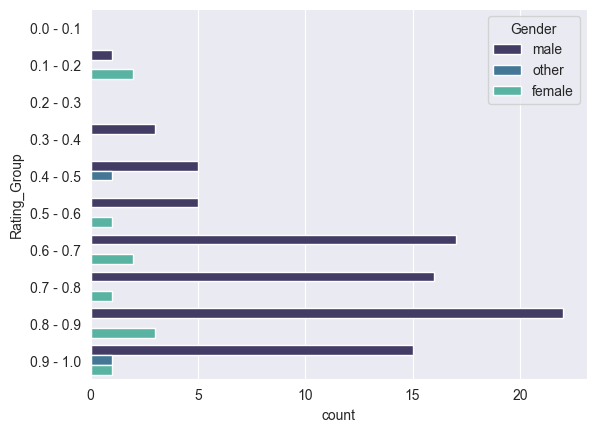

In [89]:
sns.set_style("darkgrid")
sns.countplot(data=df_supervillan, y='Rating_Group', hue='Gender', palette='mako')
plt.show()

In [83]:
mako_primary = sns.color_palette('mako', n_colors=10)[-3]
mako_secondary=sns.color_palette('mako', n_colors=10)[-7]

### Violinplot & Swarmplot
#### This plots help to visualize distribution of rating.

In [102]:
sns.set_style("darkgrid")

<Axes: xlabel='Rating'>

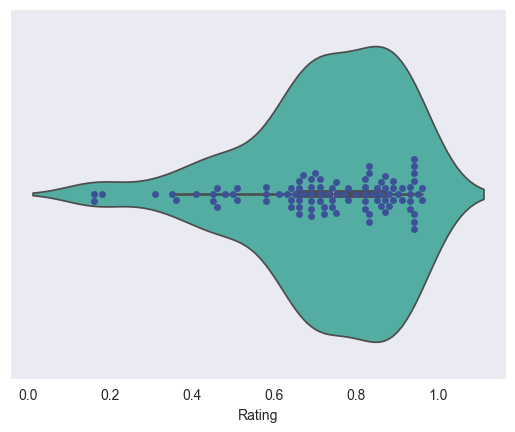

In [126]:

sns.violinplot(data=df_supervillan, x='Rating', color=mako_primary)
sns.swarmplot(data=df_supervillan, x='Rating', color=mako_secondary)

### ecdfplot
#### The human data points has less median value than the others.

<Axes: xlabel='Nominations', ylabel='Proportion'>

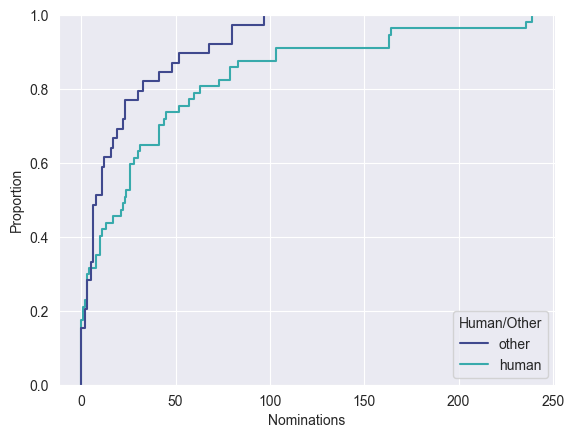

In [104]:

sns.ecdfplot(data=df_supervillan, x='Nominations',hue = 'Human/Other', palette='mako')

### Barplot
#### This plot shows distributions and mean of each rating groups.

C:\Users\kenne\AppData\Local\Temp\ipykernel_25952\2777772056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_supervillan, x='Rating_Group', y='IGN_Rank',palette='mako')


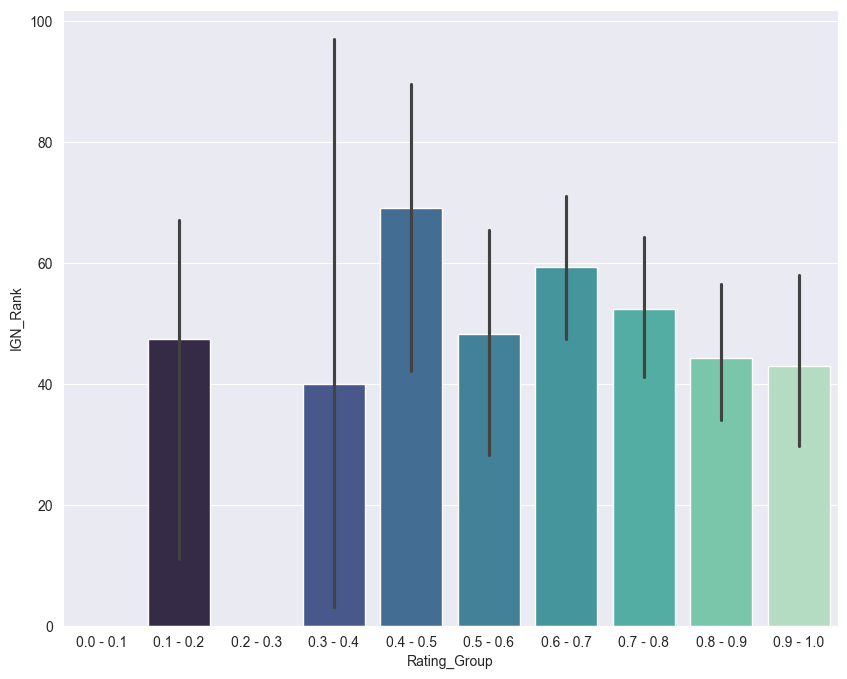

In [92]:

plt.figure(figsize=(10, 8))
sns.barplot(data=df_supervillan, x='Rating_Group', y='IGN_Rank',palette='mako')
plt.show()

### Scatterplot
#### This plot shows there are no significant bivariate relationships between rating, IGN rank, and type. 

<Axes: xlabel='IGN_Rank', ylabel='Rating'>

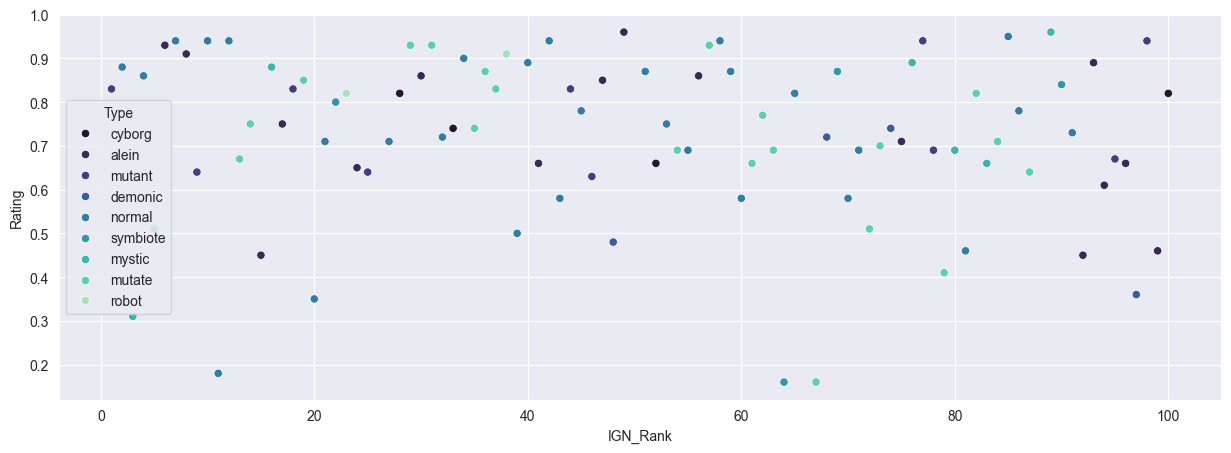

In [93]:

plt.figure(figsize=(15,5))
sns.scatterplot(x=df_supervillan['IGN_Rank'],y=df_supervillan['Rating'],hue=df_supervillan['Type'], palette = 'mako')

### Relplot
#### This plots compare relationships between IGN rank and Award wins of others and human. 

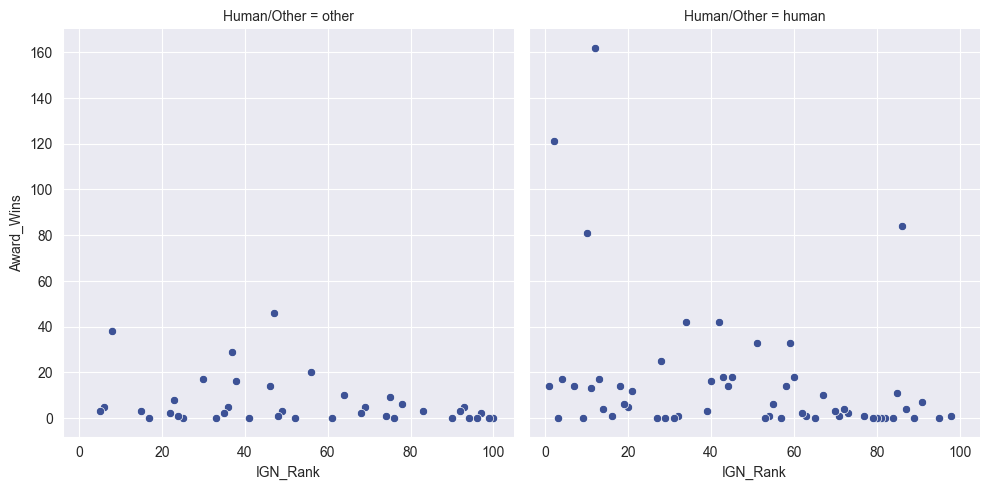

In [94]:

sns.relplot(data=df_supervillan, x='IGN_Rank',y='Award_Wins', col ='Human/Other',color=mako_secondary)

### Hisplot & kdeplot
#### This plots show the density relationships of rating and IGN rank. 

<Axes: xlabel='IGN_Rank', ylabel='Rating'>

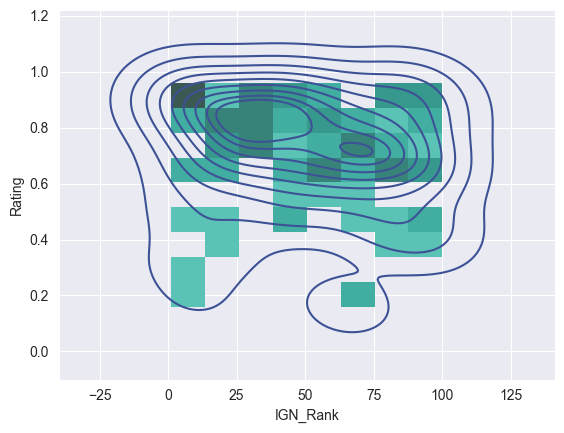

In [95]:

sns.histplot(data=df_supervillan, x='IGN_Rank', y='Rating',color =mako_primary)
sns.kdeplot(data=df_supervillan, x='IGN_Rank', y='Rating',color = mako_secondary)

### jointplot 
#### This plot is useful to demonstrate both distributions and the density relatioships. 

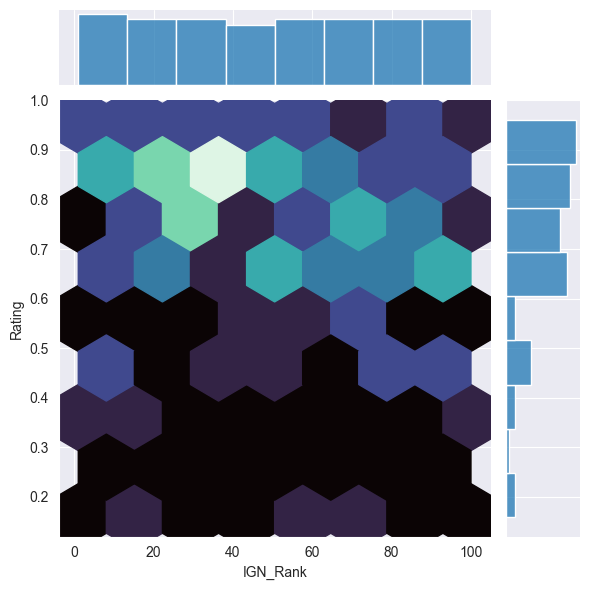

In [100]:
sns.jointplot(data=df_supervillan, x='IGN_Rank', y='Rating',kind = 'hex',cmap = 'mako')

### lmplot
#### This plot shows the regression line from the scatterplot of IGN rank and rating. 

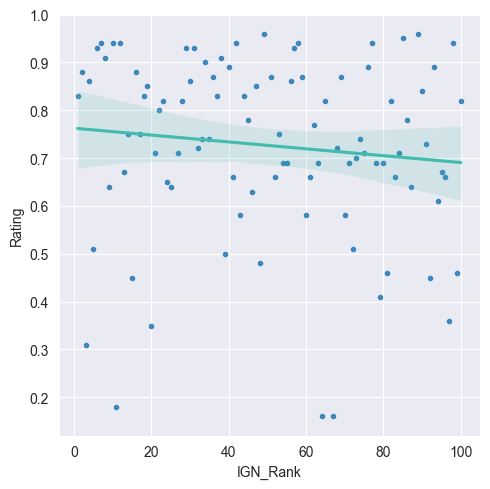

In [105]:
sns.lmplot(data=df_supervillan, x='IGN_Rank', y='Rating',markers =".",line_kws={'color': mako_primary})

### Relplot
#### This plots show the scatter plots of IGN rank and rating by different genders.

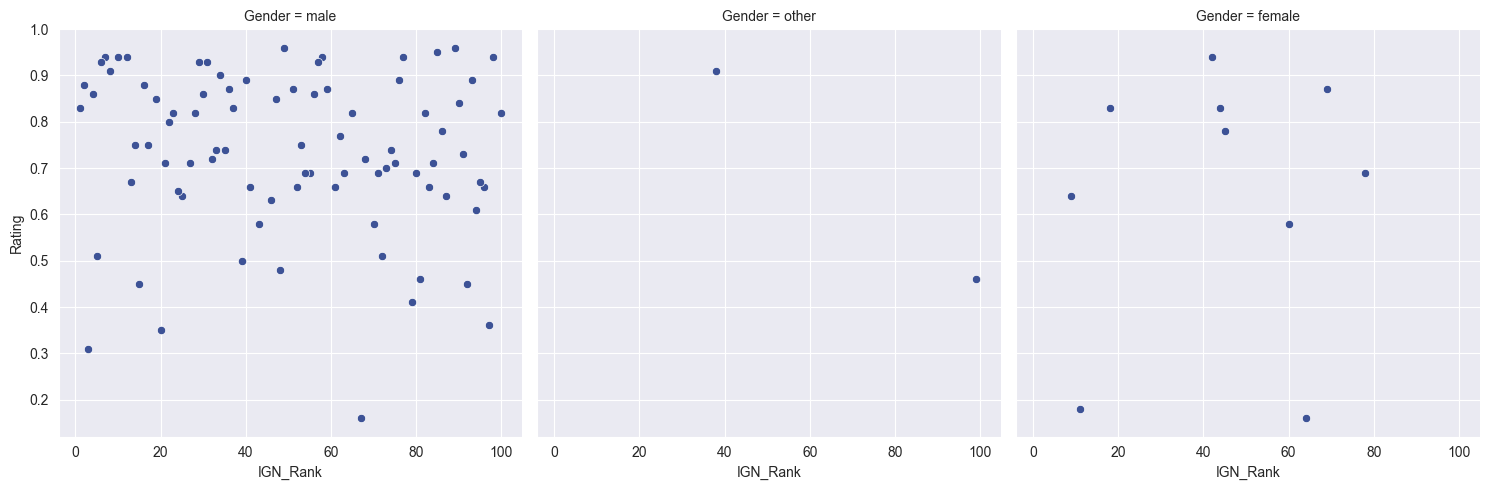

In [106]:
sns.relplot(data=df_supervillan, x='IGN_Rank', y='Rating', col = 'Gender', color = mako_secondary)

### Facet
#### Facet is useful when examine two catergorical values.

C:\Users\kenne\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


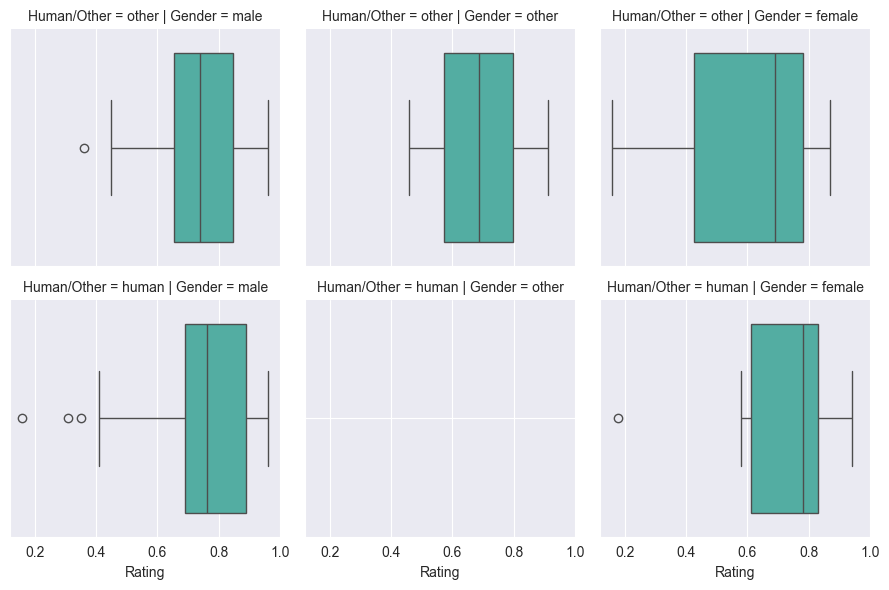

In [107]:
facet = sns.FacetGrid(data= df_supervillan, col ='Gender', row = 'Human/Other')
facet.map(sns.boxplot,'Rating',color = mako_primary)

### Pairplot
#### This plot show visualization of bivariate relationships between multiple pairwise combinations of numerical variables in a dataset.

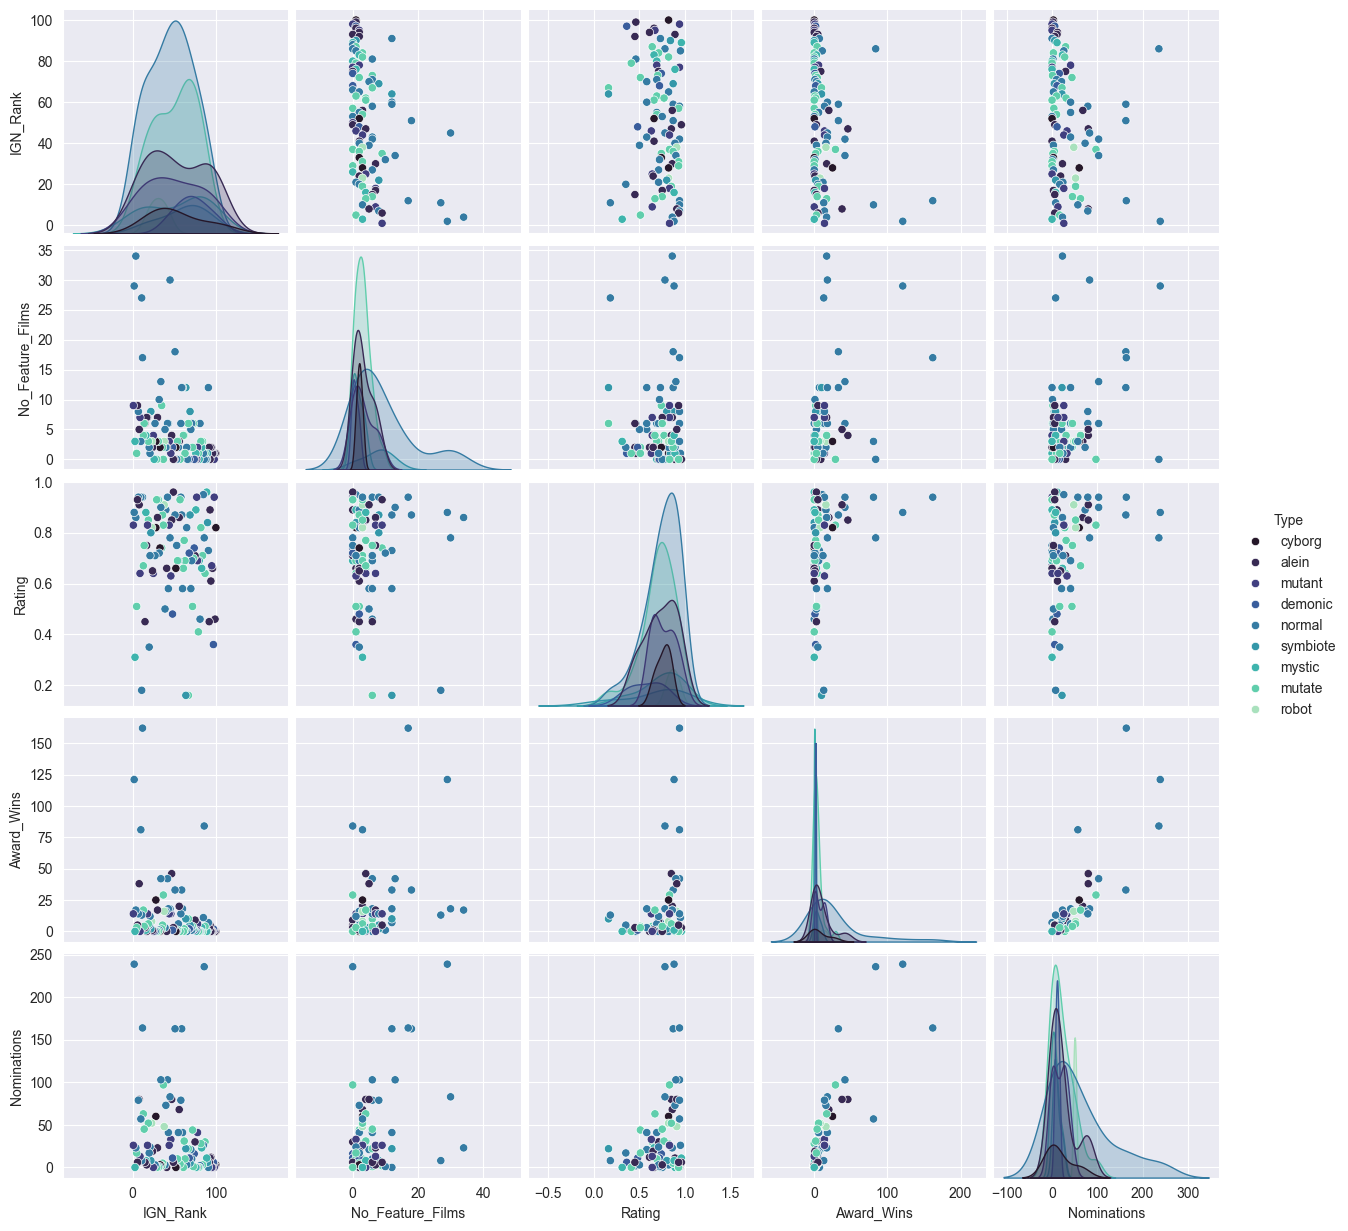

In [108]:
sns.pairplot(data=df_supervillan, hue ='Type', palette='mako')

### Dropping Catergorical Value 

In [109]:
numeric_data = df_supervillan.select_dtypes(include=[float, int])
print(numeric_data.corr())

                  IGN_Rank  No_Feature_Films    Rating  Award_Wins  \
IGN_Rank          1.000000         -0.388195 -0.112727   -0.284543   
No_Feature_Films -0.388195          1.000000 -0.015297    0.409842   
Rating           -0.112727         -0.015297  1.000000    0.271284   
Award_Wins       -0.284543          0.409842  0.271284    1.000000   
Nominations      -0.204565          0.388414  0.296869    0.817321   

                  Nominations  
IGN_Rank            -0.204565  
No_Feature_Films     0.388414  
Rating               0.296869  
Award_Wins           0.817321  
Nominations          1.000000  


### Heatmap
#### Useful to visualize the correlation between multiple pairwise combinations of numberical variables. 

<Axes: >

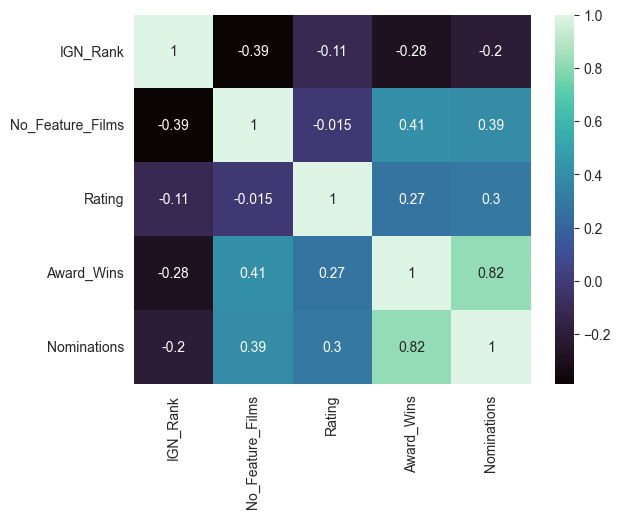

In [110]:
sns.heatmap(numeric_data.corr(), annot = True, cmap ='mako')

#### Clutermap

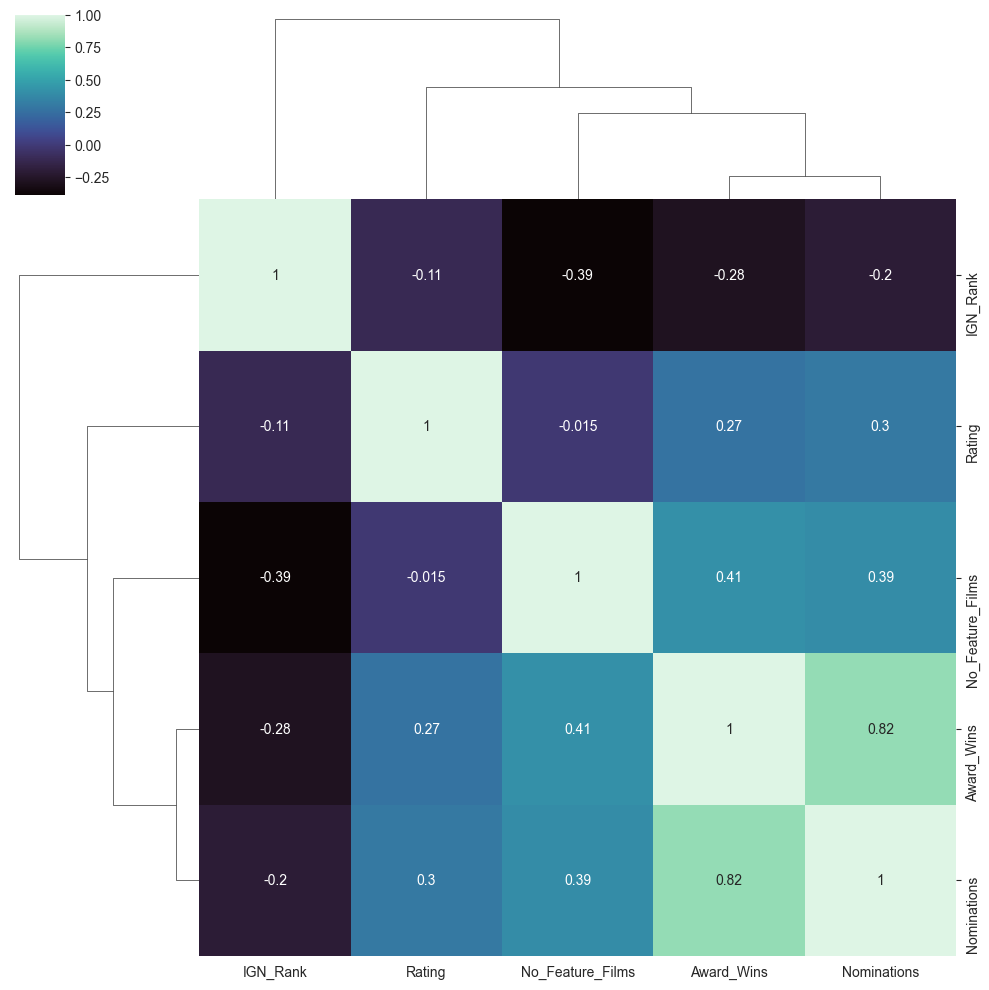

In [111]:
sns.clustermap(numeric_data.corr(), annot = True, cmap ='mako')

## New Rank vs IGN Rank 
### New rank is generated by rating, number of award wins, and number of nominations.

In [116]:
df_supervillan['Primary_Rank'] = df_supervillan['Rating'].rank(method='min', ascending=False)

df_supervillan['Secondary_Rank'] = df_supervillan.groupby('Rating')['Award_Wins'].rank(method='min', ascending=False)

df_supervillan['Tertiary_Rank'] = df_supervillan.groupby(['Rating', 'Award_Wins'])['Nominations'].rank(method='min', ascending=False)
			

In [117]:
df_supervillan = df_supervillan.sort_values(by=['Primary_Rank', 'Secondary_Rank', 'Tertiary_Rank'])
df_supervillan['Combined_Rank'] = range(1, len(df_supervillan) + 1)

In [118]:
df_supervillan.to_csv('ranked_data.csv', index=False)

### new file that shows new rank (combined rank)

In [121]:
ranked_data = pd.read_csv('ranked_data.csv')
ranked_data.head()

,Name,IGN_Rank,Main_Ft_Apperance,No_Feature_Films,Rating,Award_Wins,Nominations,Gender,Human/Other,Type,Rating_Group,Primary_Rank,Secondary_Rank,Tertiary_Rank,Combined_Rank
0,Anti-Monitor,49,Green lantern:the animated series,0,0.96,3.0,6.0,male,other,alein,0.9 - 1.0,1.0,1.0,1.0,1
1,Shade,89,Justice league,0,0.96,0.0,11.0,male,human,mystic,0.9 - 1.0,1.0,2.0,1.0,2
2,Mysterio,85,Spider-Man:Far From Home,1,0.95,11.0,26.0,male,human,normal,0.9 - 1.0,3.0,1.0,1.0,3
3,Two-Face,12,The Dark knight,17,0.94,162.0,164.0,male,human,normal,0.9 - 1.0,4.0,1.0,1.0,4
4,Kingpin,10,Spider-Man: Into the Spider-Verse,3,0.94,81.0,57.0,male,human,normal,0.9 - 1.0,4.0,2.0,1.0,5


#### Rating/IGN Rank vs Rating/New rank

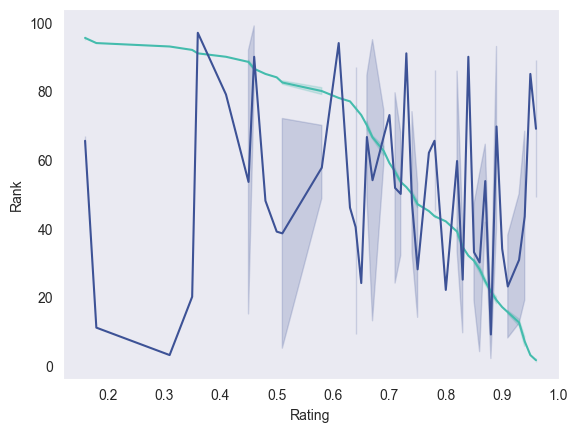

In [125]:
a= sns.lineplot(data= df_supervillan, x='Rating',y='Combined_Rank', color=mako_primary)
sns.lineplot(data= df_supervillan, x='Rating',y='IGN_Rank',color=mako_secondary)

a.set_ylabel("Rank")
plt.show()

#### Award Wins/IGN Rank vs Award Wins/New rank

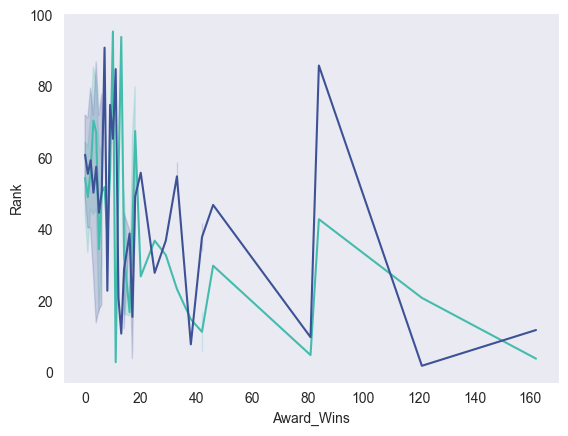

In [123]:
sns.set_style("dark")
a= sns.lineplot(data= df_supervillan, x='Award_Wins',y='Combined_Rank', color=mako_primary)
sns.lineplot(data= df_supervillan, x='Award_Wins',y='IGN_Rank',color= mako_secondary)

a.set_ylabel("Rank")
plt.show()

#### Nominations/IGN Rank vs Nominations/New rank

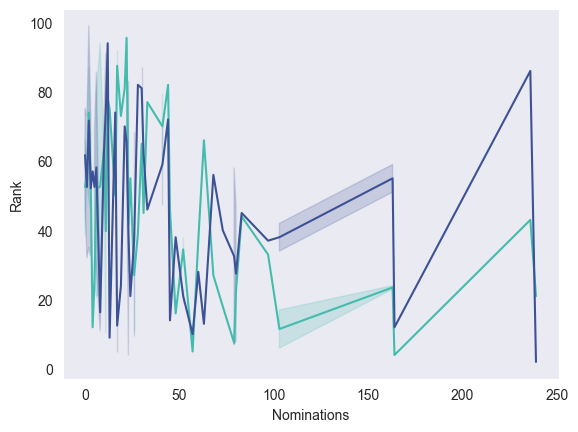

In [124]:
a= sns.lineplot(data= df_supervillan, x='Nominations',y='Combined_Rank', color=mako_primary)
sns.lineplot(data= df_supervillan, x='Nominations',y='IGN_Rank',color= mako_secondary)

a.set_ylabel("Rank")
plt.show()

### Calculating the p-values in order to find correlation between IGN Rank and New Rank

In [34]:
from scipy.stats import spearmanr

coefficient, p_value = spearmanr(df_supervillan['IGN_Rank'], ranked_data['Combined_Rank'])
print(f"Correlation Coefficient: {coefficient:.2f}")
print(f"P-Value: {p_value:.2f}")



Correlation Coefficient: 0.16
P-Value: 0.11


##### while there might be some observed correlation or relationship in your sample, the p-value of 0.11 suggests that this could be due to random chance.
##### ∣r∣<0.3: Very weak or no correlation.